<a href="https://colab.research.google.com/github/rams1987/Essay_Scoring/blob/main/essay_scoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: install kaggle

!pip install kaggle


In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ramasamyseenivasagan","key":"f41bb0714d3baef12d51ba89162604ef"}'}

In [3]:
# prompt: create a kaggle folder

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [6]:
!kaggle competitions download -c learning-agency-lab-automated-essay-scoring-2

 59% 7.00M/11.9M [00:00<00:00, 72.7MB/s]
100% 11.9M/11.9M [00:00<00:00, 107MB/s] 


In [7]:
# prompt: unzip the downloaded file

!unzip learning-agency-lab-automated-essay-scoring-2.zip


Archive:  learning-agency-lab-automated-essay-scoring-2.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [8]:
import os
import numpy as np
import pandas as pd
import spacy

In [9]:
essay_df = pd.read_csv('train.csv')

essay_df.head()

,essay_id,full_text,score
0,000d118,Many people have car where they live. The thin...,3
1,000fe60,I am a scientist at NASA that is discussing th...,3
2,001ab80,People always wish they had the same technolog...,4
3,001bdc0,"We all heard about Venus, the planet without a...",4
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3


In [11]:
# prompt: Using dataframe essay_df: add a coloumn with sentence count and word count using spacy sentence splitter

nlp = spacy.load("en_core_web_sm")

essay_df["sentence_count"] = essay_df["full_text"].apply(lambda text: len(list(nlp(text).sents)))
essay_df["word_count"] = essay_df["full_text"].apply(lambda text: len(text.split()))

essay_df.head()

,essay_id,full_text,score,sentence_count,word_count
0,000d118,Many people have car where they live. The thin...,3,13,498
1,000fe60,I am a scientist at NASA that is discussing th...,3,20,332
2,001ab80,People always wish they had the same technolog...,4,25,550
3,001bdc0,"We all heard about Venus, the planet without a...",4,21,451
4,002ba53,"Dear, State Senator\n\nThis is a letter to arg...",3,16,373


from matplotlib import pyplot as plt
_df_0['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sentence_count'].plot(kind='hist', bins=20, title='sentence_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['word_count'].plot(kind='hist', bins=20, title='word_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('essay_id').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('full_text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='score', y='sentence_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='sentence_count', y='word_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['sentence_count'].plot(kind='line', figsize=(8, 4), title='sentence_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['word_count'].plot(kind='line', figsize=(8, 4), title='word_count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['full_text'].value_counts()
    for x_label, grp in _df_10.groupby('essay_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('essay_id')
_ = plt.ylabel('full_text')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['essay_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='score', y='essay_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_12['full_text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_12, x='score', y='full_text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['essay_id'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='sentence_count', y='essay_id', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['full_text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='sentence_count', y='full_text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

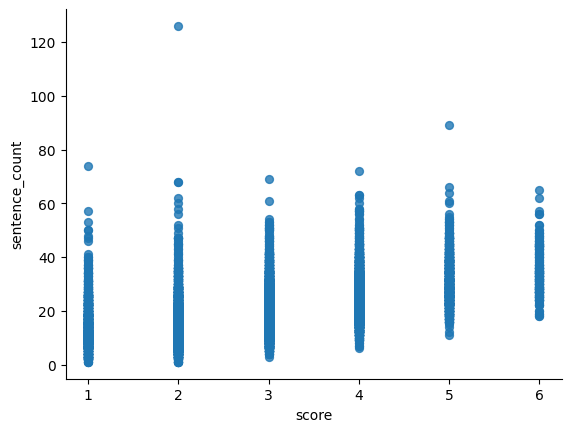

In [15]:
# @title score vs sentence_count

from matplotlib import pyplot as plt
essay_df.plot(kind='scatter', x='score', y='sentence_count', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

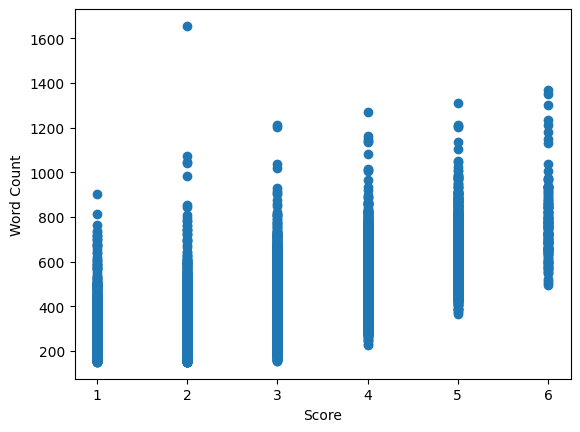

In [13]:
# @title Essay Score vs Word Count

import matplotlib.pyplot as plt
plt.scatter(essay_df['score'], essay_df['word_count'])
plt.xlabel('Score')
_ = plt.ylabel('Word Count')

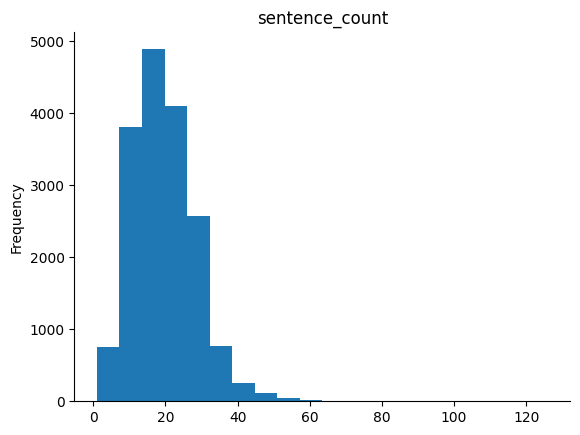

In [14]:
# @title sentence_count

from matplotlib import pyplot as plt
essay_df['sentence_count'].plot(kind='hist', bins=20, title='sentence_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
# prompt: train a model to predict score of the essay

from sklearn.linear_model import LinearRegression

X = essay_df[['sentence_count', 'word_count']]
y = essay_df['score']

model = LinearRegression().fit(X, y)


In [17]:
# prompt: test the model against the test.csv

import pandas as pd
test_df = pd.read_csv('test.csv')
test_df["sentence_count"] = test_df["full_text"].apply(lambda text: len(list(nlp(text).sents)))
test_df["word_count"] = test_df["full_text"].apply(lambda text: len(text.split()))

X_test = test_df[['sentence_count', 'word_count']]
y_pred = model.predict(X_test)

print(y_pred)


[3.44165299 2.79653307 3.79060125]


In [18]:
test_df['score'] = y_pred
test_df.head()

,essay_id,full_text,sentence_count,word_count,score
0,000d118,Many people have car where they live. The thin...,13,498,3.441653
1,000fe60,I am a scientist at NASA that is discussing th...,20,332,2.796533
2,001ab80,People always wish they had the same technolog...,25,550,3.790601
